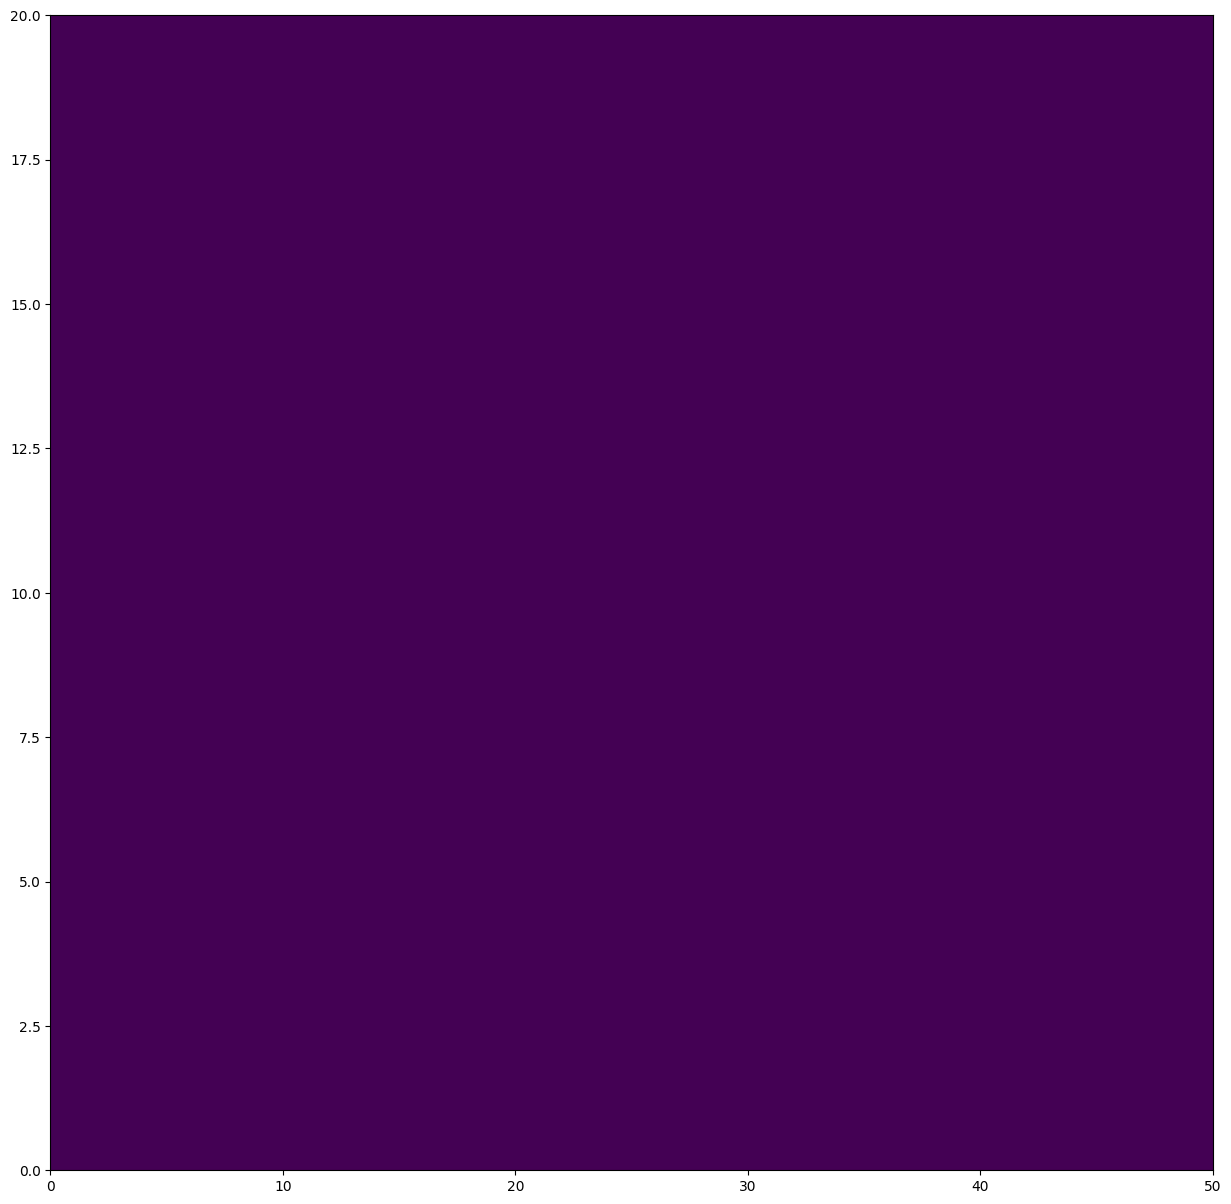

Residual:  0.22693080050735087 Mass Residual: -0.00024272077033117497 Mass: -92.48329699066721  at  100 th iteration   Time:  0.36669500000061817
Residual:  0.1029564984393499 Mass Residual: -3.825414133858597e-05 Mass: -91.60934390892363  at  200 th iteration   Time:  0.7247686999999132
Residual:  0.05008679887530165 Mass Residual: -1.698808616135961e-05 Mass: -91.37702516743687  at  300 th iteration   Time:  1.1010719000005338
Residual:  0.029157797013709186 Mass: -91.285959786842
Solution converged at  376 th iteration


In [1]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map


# block_coordinates = [(0,0),(0,5),(5,5),(5,0)]
block_coordinates = [(0,0),(0,0.8),(1.5,0.8),(1.5,0)]

# print(list(block_coordinates[3]))
node_numbers = [50, 20]

space = Mesh(block_coordinates, node_numbers) #it seems like a one block. Build more sopisticated block type structures
# space.nonuniform_block_mesh_2D(-1.2, -1.4)
# space.nonuniform_mesh_2D(-1.2, -1.4)

#|----------------------------------------------
a, b = space.nonuniform_block_mesh_2D(1, 1)
circle = object()
rectangle = object()
# circle.circle(0.15, (0.4,0.4))
property_map = Map(space)
# rectangle.rectang(0.9, 0.2, (0.65,0.4))
# property_map.create_object(circle)
# property_map.create_object(rectangle)
# rectangle.rectang(1.0, 0.05, (0.5,0.1))
# property_map.create_object(rectangle)
property_map.show()
#|-----------------------------------------------

# property_map.show()
# circle.circle(0.4, (3.4,2.4))
# space.create_object(circle)
# circle.circle(0.4, (2.4,1.4))
# space.create_object(circle)
#


BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'D'}
BCs_values = {'W': 1, 'S': 0, 'E': 0.1, 'N': 0.4}


solution = PDE_2D_Solver(space,BCs)
solution.solver(BCs_values, "potensial", property_map, 1.4, 1e-5, itteration_type="nodebynode")

# solution.countour()

# compt_dom = Mesh(block_coordinates, node_numbers)
# compt_dom.uniform_block_mesh_2D()

# compt_dom.plot2D()
# space.plot2D()
# compt_dom.Jacobi(a, b)
# print(compt_dom.Jacobian)

# print(OneDcentraldiff(compt_dom.matricies[0], a))
# print(OneDcentraldiff(compt_dom.matricies[0], b, axis=1))
# print(OneDcentraldiff(compt_dom.matricies[1], a))
# print(OneDcentraldiff(compt_dom.matricies[1], -b, axis=1))
# compt_dom.matricies[1] 




In [ ]:
solution.velocityfield("stream")
solution.plot2D("stream")
solution.stream()
solution.quiver()

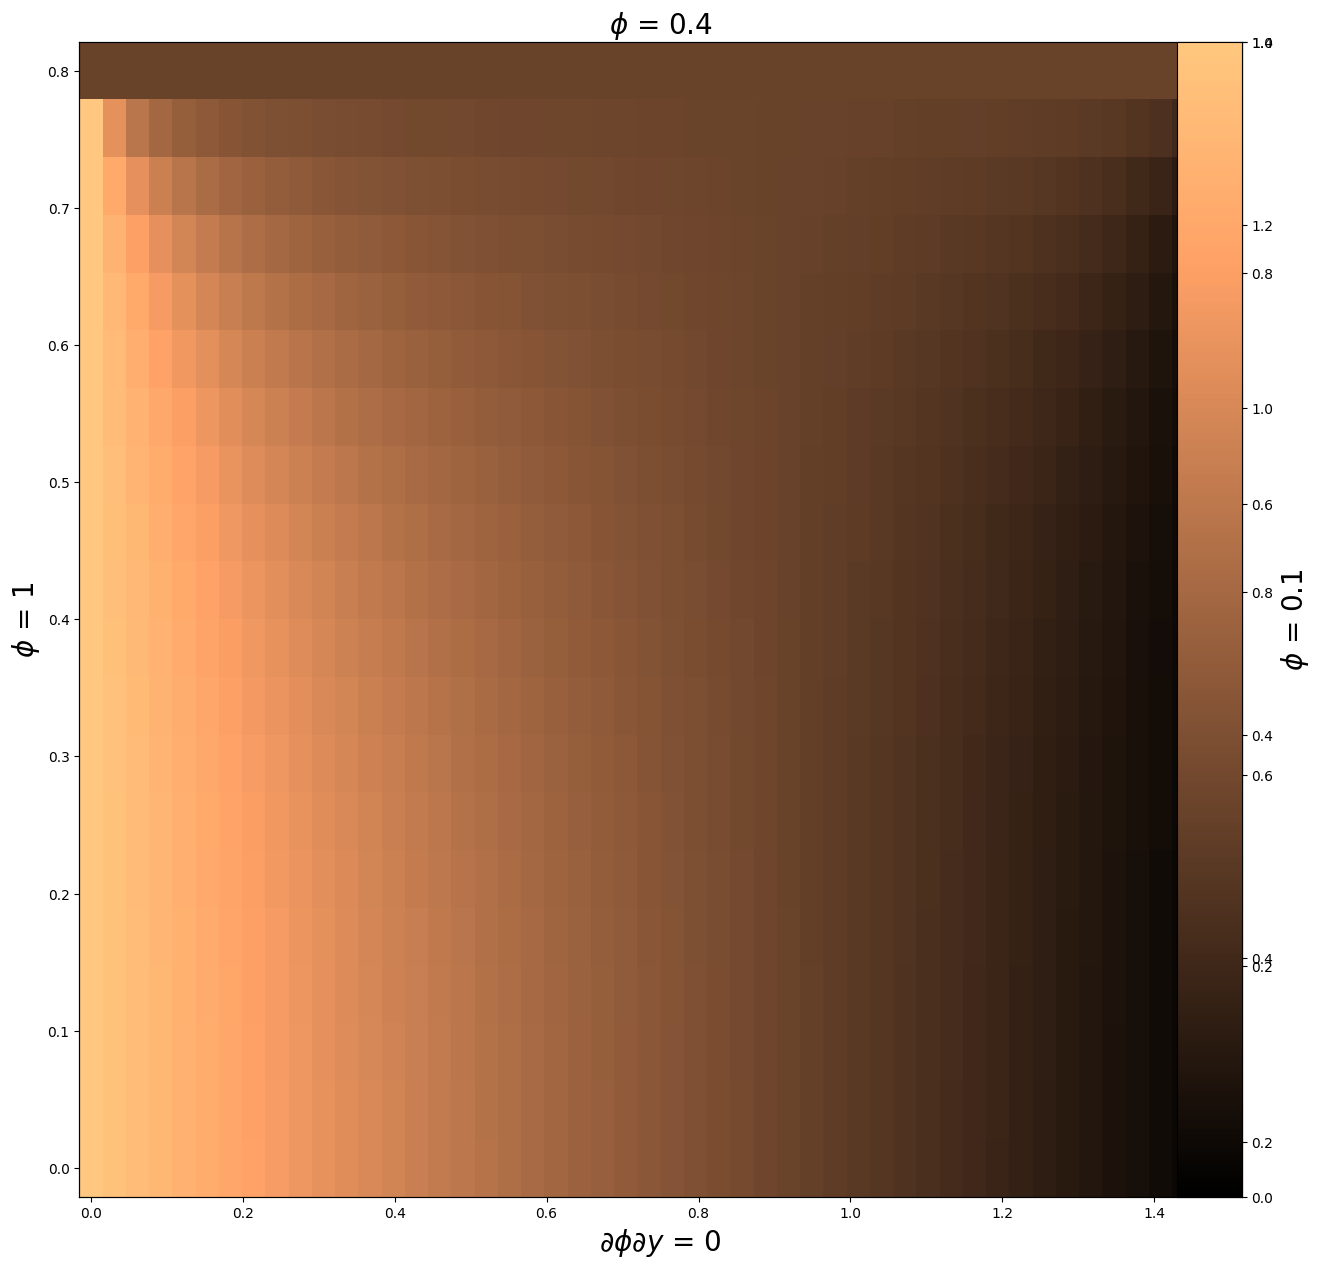

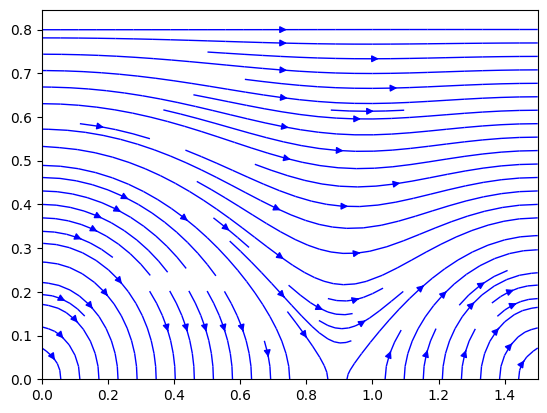

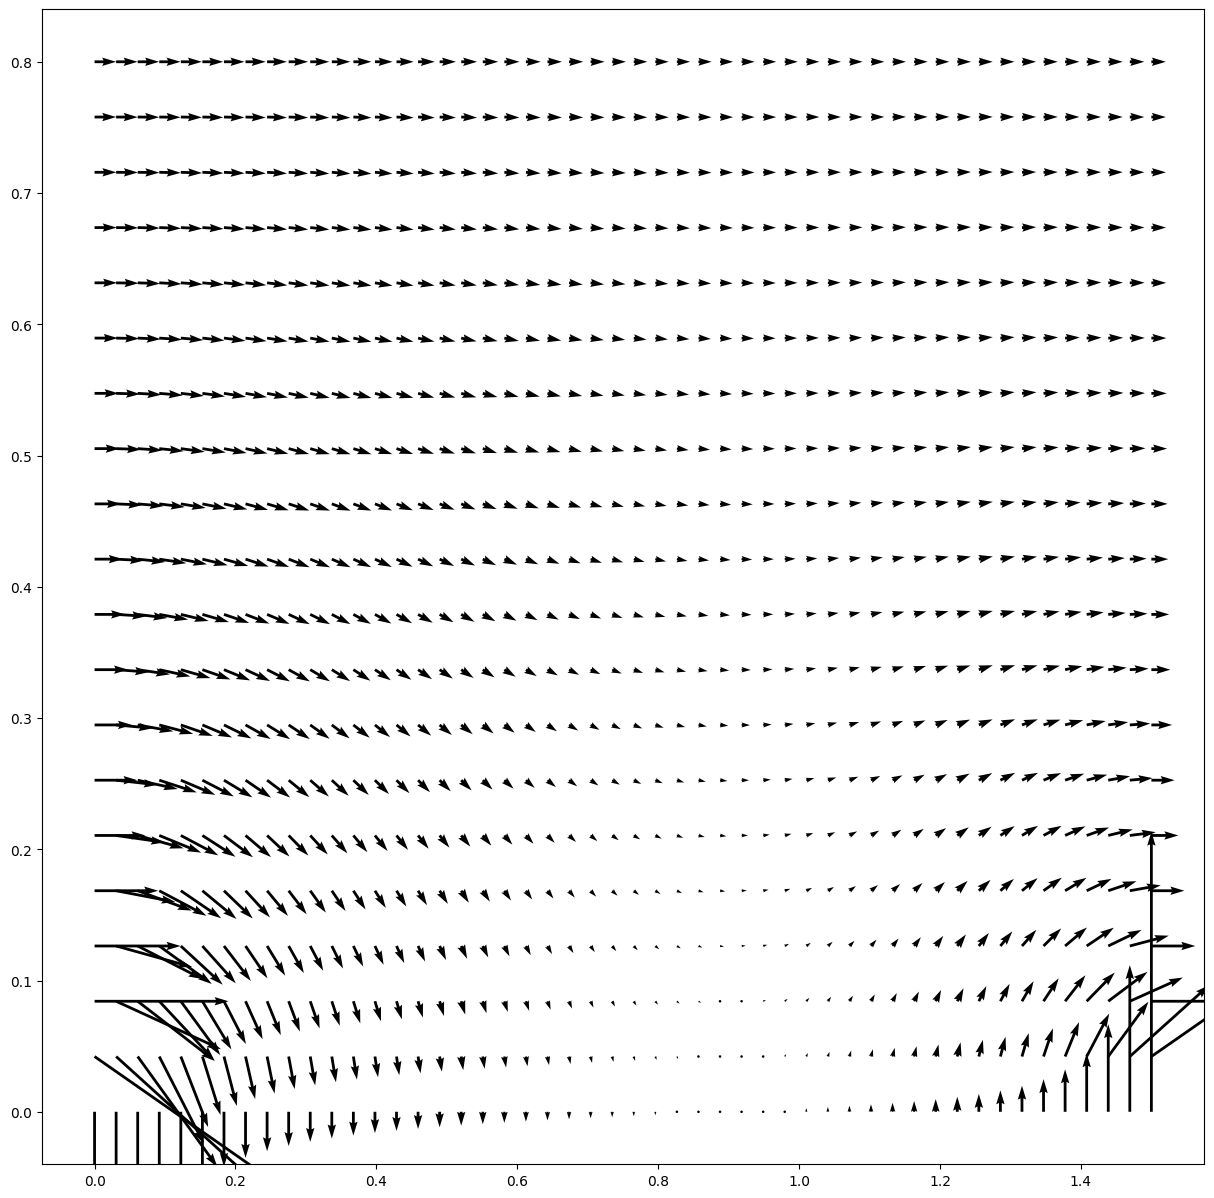

In [2]:
solution.velocityfield("potensial")
solution.plot2D("potensial")
solution.stream()
solution.quiver()
phii = solution.solution
a = solution.velocity[:,:,0]

In [ ]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map
import scipy as sp
from importtools import import_geometry


naca0012 = import_geometry('naca0012.txt')
naca0012 = closeshape_interpolation(naca0012, 2000)


naca0012[:,0] += 0.20
naca0012[:,1] += 0


block_coordinates = [(0,-0.8),(0,0.8),(3.5,0.8),(3.5,-0.8)]
node_numbers = [200, 300]
space_trial = Mesh(block_coordinates, node_numbers) 

a, b = space_trial.uniform_block_mesh_2D()

# space_trial.plot2D()

airfoil = object()
airfoil.airfoil(naca0012, scale=2.3)
airfoil_map = Map(space_trial)
airfoil_map.create_object(airfoil)
airfoil_map.show()

area_matrix = airfoil_map.area


BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'N'}
BCs_values = {'W': 1, 'S': 0, 'E': 0, 'N': 0}

solution = PDE_2D_Solver(space_trial,BCs)
solution.solver(BCs_values, "potensial", airfoil_map, 1.5, 0.12, itteration_type="nodebynode")

solution.velocityfield("potensial")
solution.plot2D("potensial")
solution.stream()
solution.quiver()

# a = solution.solution






In [ ]:
import numpy as np
import pickle as pkl

#save the output data solution.solution to a file. the file name contains the solution type and the number of nodes, the object name solved and the BCs, and the BCs values.
#use parameters to change the file name 

def save_data(solution, solution_type, BCs, BCs_values, object_name, node_numbers):
    
    file_name = solution_type + "_" + str(node_numbers[0]) + "_" + str(node_numbers[1]) + "_" + object_name + "_"
    np.save(file_name, solution)
    print("data saved to file: " + file_name)

#load the data from the file
def load_data(file_name):
    data = np.loadtxt(file_name, delimiter=",")
    print("data loaded from file: " + file_name)
    return data

#save the data to a file
# save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil", node_numbers)
save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil_smalled", node_numbers)

# with open("airfoil.pkl", "wb") as f:
    # pkl.dump(solution, f)






In [ ]:
import pickle as pkl
with open("airfoil.pkl", "rb") as f:
    solution_temp = pkl.load(f)

In [ ]:
solution_temp.velocityfield("potensial")
solution_temp.plot2D("potensial")
solution_temp.stream()
solution_temp.quiver()


In [ ]:
a = airfoil_map.area